In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [114]:
df=pd.read_csv('https://raw.githubusercontent.com/shivankurkapoor/flowrate-prediction/master/data.csv')

In [115]:
df.head()

,Time,CasingPressure,FlowRate,LinePressure,StaticPressure,TubingPressure,Qmin
0,1437815718,515.764,315.083,289.940,287.979,235.035,105.083
1,1437815737,515.798,320.269,289.930,287.925,234.976,105.269
2,1437815916,515.890,309.478,290.479,288.598,235.251,105.478
3,1437816101,516.164,181.501,291.027,289.846,235.892,105.501
4,1437816459,516.256,194.514,290.753,289.416,235.159,105.514


In [116]:
df['Time']=pd.to_datetime(df['Time'], unit='s')
df.head()

,Time,CasingPressure,FlowRate,LinePressure,StaticPressure,TubingPressure,Qmin
0,2015-07-25 09:15:18,515.764,315.083,289.940,287.979,235.035,105.083
1,2015-07-25 09:15:37,515.798,320.269,289.930,287.925,234.976,105.269
2,2015-07-25 09:18:36,515.890,309.478,290.479,288.598,235.251,105.478
3,2015-07-25 09:21:41,516.164,181.501,291.027,289.846,235.892,105.501
4,2015-07-25 09:27:39,516.256,194.514,290.753,289.416,235.159,105.514


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df1=df
df1['Time']=le.fit_transform(df1['Time'])
df1

,Time,CasingPressure,FlowRate,LinePressure,StaticPressure,TubingPressure,Qmin
0,0,515.764,315.083,289.940,287.979,235.035,105.083
1,1,515.798,320.269,289.930,287.925,234.976,105.269
2,2,515.890,309.478,290.479,288.598,235.251,105.478
3,3,516.164,181.501,291.027,289.846,235.892,105.501
4,4,516.256,194.514,290.753,289.416,235.159,105.514
...,...,...,...,...,...,...,...
21639,21639,622.859,856.341,283.991,266.215,360.480,105.341
21640,21640,622.585,842.984,285.088,265.908,360.663,104.984
21641,21641,623.134,933.123,286.276,266.082,361.030,105.123
21642,21642,622.585,928.875,287.007,265.860,362.312,104.875


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df1)

In [ ]:
df_scaled

array([[-1.73197078,  0.65500714, -1.19549574, ...,  0.00941919,
        -0.28714098, -0.89816702],
       [-1.73181074,  0.65544067, -1.1799116 , ...,  0.00867594,
        -0.28822187, -0.25498971],
       [-1.73165069,  0.65661375, -1.21233899, ...,  0.01793896,
        -0.28318383,  0.46772028],
       ...,
       [ 1.73165069,  2.02407604,  0.66173952, ..., -0.29196616,
         2.02110438, -0.75984932],
       [ 1.73181074,  2.01707577,  0.64897411, ..., -0.29502172,
         2.0445908 , -1.61741906],
       [ 1.73197078,  2.02407604,  0.3656649 , ..., -0.30579875,
         2.06137204,  0.87921544]])

# DBSCAN

In [ ]:
from sklearn.neighbors import NearestNeighbors
neighbors=NearestNeighbors(n_neighbors=14)
nbrs=neighbors.fit(df_scaled)
distances, indexes=nbrs.kneighbors(df_scaled)
distances=np.sort(distances, axis=0)


Text(0.5, 1.0, 'Optimum Ebsilon')

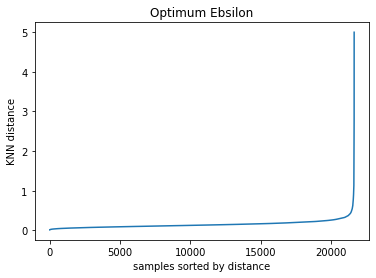

In [ ]:
distances=distances[:,1]
plt.plot(distances)
plt.xlabel('samples sorted by distance')
plt.ylabel('KNN distance')
plt.title('Optimum Ebsilon')

In [ ]:
from sklearn.cluster import DBSCAN
cc=DBSCAN(eps=0.4, min_samples=14, metric='euclidean')
DB=cc.fit_predict(df_scaled)


In [ ]:
labels=pd.DataFrame(DB, columns=['Clusters'])
labels.value_counts()

Clusters
 60         4785
-1          4582
 4          1196
 6           909
 8           714
            ... 
 79           12
 59           12
 69           11
 83           11
 75            9
Length: 100, dtype: int64

In [ ]:
df_new=pd.DataFrame(df_scaled, columns=df.columns)
df_new['Clusters']=DB
df_new.head()

,Time,CasingPressure,FlowRate,LinePressure,StaticPressure,TubingPressure,Qmin,Clusters
0,-1.731971,0.655007,-1.195496,-0.037425,0.009419,-0.287141,-0.898167,-1
1,-1.731811,0.655441,-1.179912,-0.037594,0.008676,-0.288222,-0.254990,-1
2,-1.731651,0.656614,-1.212339,-0.028317,0.017939,-0.283184,0.467720,-1
3,-1.731491,0.660108,-1.596915,-0.019056,0.035116,-0.271441,0.547253,-1
4,-1.731331,0.661281,-1.557810,-0.023686,0.029198,-0.284869,0.592206,-1


In [ ]:
df_inverse=pd.DataFrame(df_scaled, columns=df.columns)
df_inverse=scaler.inverse_transform(df_inverse)

df_inverse=pd.DataFrame(df_inverse, columns=df.columns)
df_inverse['clusters']=DB
df_inverse

,Time,CasingPressure,FlowRate,LinePressure,StaticPressure,TubingPressure,Qmin,clusters
0,0.0,515.764,315.083,289.940,287.979,235.035,105.083,-1
1,1.0,515.798,320.269,289.930,287.925,234.976,105.269,-1
2,2.0,515.890,309.478,290.479,288.598,235.251,105.478,-1
3,3.0,516.164,181.501,291.027,289.846,235.892,105.501,-1
4,4.0,516.256,194.514,290.753,289.416,235.159,105.514,-1
...,...,...,...,...,...,...,...,...
21639,21639.0,622.859,856.341,283.991,266.215,360.480,105.341,-1
21640,21640.0,622.585,842.984,285.088,265.908,360.663,104.984,-1
21641,21641.0,623.134,933.123,286.276,266.082,361.030,105.123,-1
21642,21642.0,622.585,928.875,287.007,265.860,362.312,104.875,-1


In [86]:
df_inverse['clusters'].nunique()

100

In [ ]:
import plotly.express as px
px.scatter(df_inverse['FlowRate'], df_inverse['TubingPressure'], color=df_inverse['clusters'])

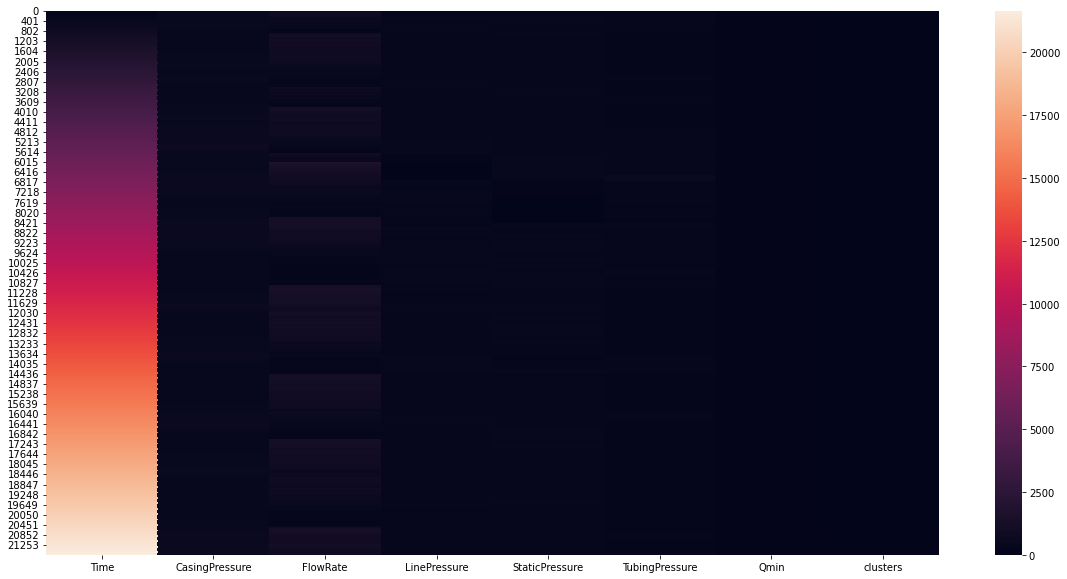

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df_inverse)

(array([8056.,  478., 1206., 1090., 2319.,  737., 5471.,  728.,  626.,
         933.]),
 array([-1. ,  8.9, 18.8, 28.7, 38.6, 48.5, 58.4, 68.3, 78.2, 88.1, 98. ]),
 <a list of 10 Patch objects>)

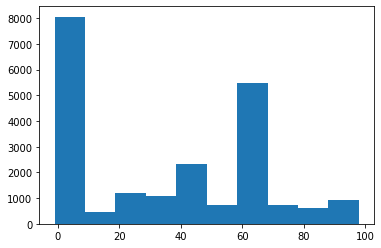

In [ ]:
plt.hist(df_inverse['clusters'])

# LOF

In [66]:
from sklearn.neighbors import LocalOutlierFactor
clf=LocalOutlierFactor(n_neighbors=100, metric='euclidean', contamination=0.5)
clf.fit(df_scaled)


LocalOutlierFactor(contamination=0.5, metric='euclidean', n_neighbors=100)

In [72]:
df_scaled_df=pd.DataFrame(df_scaled, columns=df.columns)

In [73]:
df_lof=pd.DataFrame(df_scaled, columns=df.columns)
df_lof['scores']=clf.negative_outlier_factor_
df_lof['Anomaly']=clf.fit_predict(df_lof.iloc[:, :7])


In [74]:
Anomaly=df_lof.loc[df_lof['Anomaly']==-1]
anomaly_index=list(Anomaly.index)
#to see the values with Anomaly

In [75]:
df_lof.head()

,Time,CasingPressure,FlowRate,LinePressure,StaticPressure,TubingPressure,Qmin,scores,Anomaly
0,-1.731971,0.655007,-1.195496,-0.037425,0.009419,-0.287141,-0.898167,-1.048158,-1
1,-1.731811,0.655441,-1.179912,-0.037594,0.008676,-0.288222,-0.254990,-1.048189,-1
2,-1.731651,0.656614,-1.212339,-0.028317,0.017939,-0.283184,0.467720,-1.037007,-1
3,-1.731491,0.660108,-1.596915,-0.019056,0.035116,-0.271441,0.547253,-1.172522,-1
4,-1.731331,0.661281,-1.557810,-0.023686,0.029198,-0.284869,0.592206,-1.162516,-1


In [84]:
px.scatter(df_lof['FlowRate'], df_lof['TubingPressure'], color=df_lof['Anomaly'])

Here, i will exclude using the time data to see the results

In [108]:
df_OriginaL=df
df_OriginaL['Anomaly']=clf.fit_predict(df_lof.iloc[:, 1:7])

In [109]:
df_OriginaL.head()

,Time,CasingPressure,FlowRate,LinePressure,StaticPressure,TubingPressure,Qmin,Anomaly
0,0,515.764,315.083,289.940,287.979,235.035,105.083,-1
1,1,515.798,320.269,289.930,287.925,234.976,105.269,-1
2,2,515.890,309.478,290.479,288.598,235.251,105.478,-1
3,3,516.164,181.501,291.027,289.846,235.892,105.501,-1
4,4,516.256,194.514,290.753,289.416,235.159,105.514,-1


In [125]:
df_Originall=df
df_Originall['Anomaly']=clf.fit_predict(df_Originall.iloc[:,1:7])


In [126]:
df_Originall

,Time,CasingPressure,FlowRate,LinePressure,StaticPressure,TubingPressure,Qmin,Anomaly
0,2015-07-25 09:15:18,515.764,315.083,289.940,287.979,235.035,105.083,1
1,2015-07-25 09:15:37,515.798,320.269,289.930,287.925,234.976,105.269,1
2,2015-07-25 09:18:36,515.890,309.478,290.479,288.598,235.251,105.478,1
3,2015-07-25 09:21:41,516.164,181.501,291.027,289.846,235.892,105.501,-1
4,2015-07-25 09:27:39,516.256,194.514,290.753,289.416,235.159,105.514,-1
...,...,...,...,...,...,...,...,...
21639,2015-09-26 22:21:37,622.859,856.341,283.991,266.215,360.480,105.341,-1
21640,2015-09-26 22:24:36,622.585,842.984,285.088,265.908,360.663,104.984,-1
21641,2015-09-26 22:27:40,623.134,933.123,286.276,266.082,361.030,105.123,-1
21642,2015-09-26 22:30:40,622.585,928.875,287.007,265.860,362.312,104.875,-1


In [130]:
px.scatter(df_Originall, x=df_Originall['FlowRate'], y=df_Originall['TubingPressure'], color=df_Originall['Anomaly'])


# KMeans 

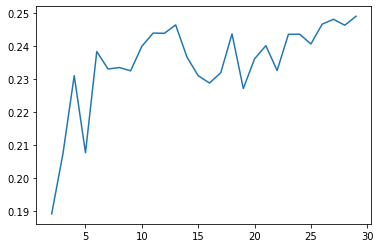

In [91]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
cluster_range=range(2,30)
plot_k=[]
for i in cluster_range:
  cluster=KMeans(n_clusters=i)
  cluster_label=cluster.fit_predict(df_scaled)
  silh_avg=silhouette_score(df_scaled, cluster_label)
  plot_k.append(silh_avg)

plt.plot(cluster_range, plot_k)

In [93]:
new_fig=KMeans(n_clusters=100)
new_fig=new_fig.fit(df_scaled)
labeled=new_fig.labels_
df_kmeans=df_scaled_df
df_kmeans['clusteres']=labeled
grouped=df_kmeans.groupby(by='clusteres').mean()

the silhouette score is : 0.26968500602418893


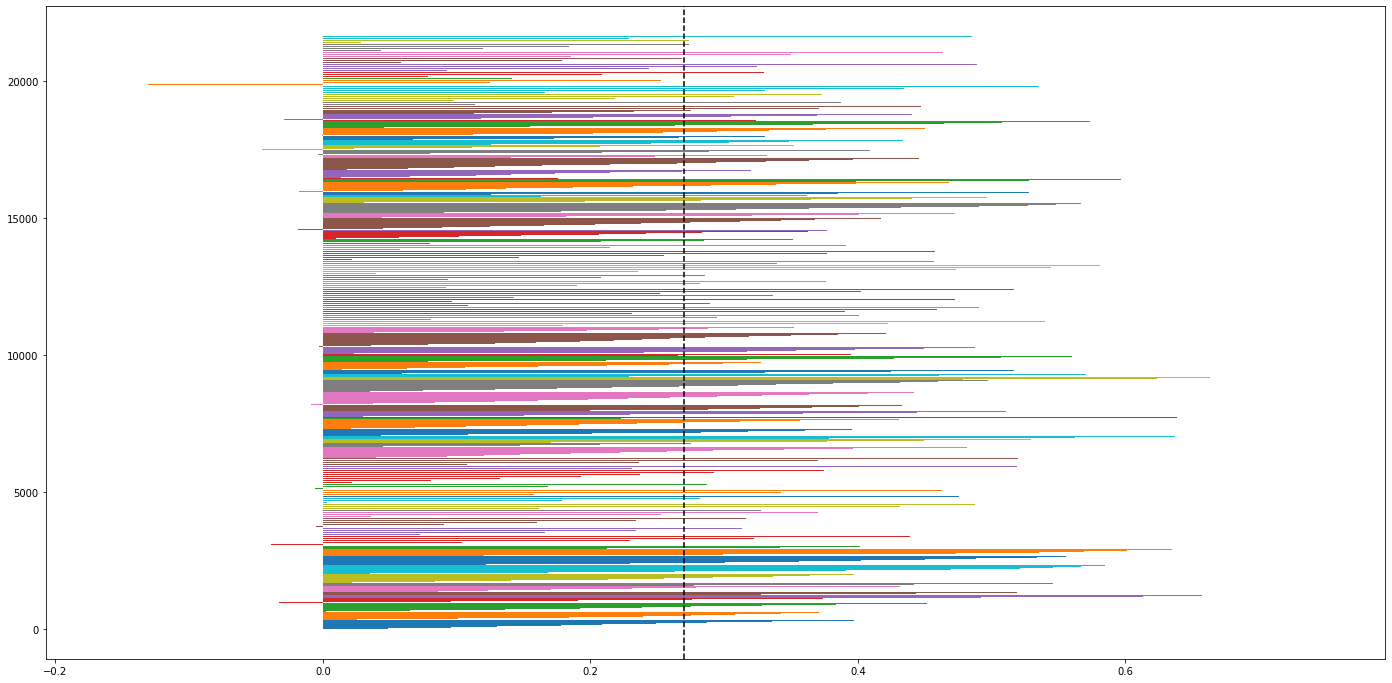

In [97]:
plt.figure(figsize=(24,12))
cluster_labels=np.unique(labeled)
silhouette_vals=silhouette_samples(df_scaled, labeled, metric='euclidean')
ylow=yupp=0
yticks=[]
for i, c in enumerate(cluster_labels):
  c_silho=silhouette_vals[labeled==c]
  c_silho.sort()
  yupp+=len(c_silho)
  plt.barh(range(ylow,yupp), c_silho)
  yticks.append((ylow+yupp)/2)
  ylow+=len(c_silho)
silhouette_avg=np.mean(silhouette_vals)
plt.axvline(silhouette_avg, linestyle='--', color='black')
print(f'the silhouette score is : {silhouette_avg}')

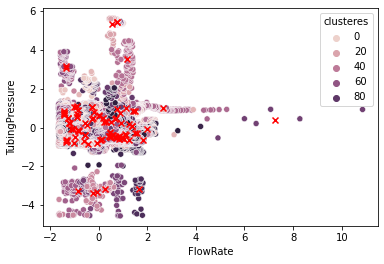

In [104]:
sns.scatterplot(data=df_kmeans, x=df_kmeans['FlowRate'], y=df_kmeans['TubingPressure'], hue=df_kmeans['clusteres'])
plt.scatter(new_fig.cluster_centers_[:,2],new_fig.cluster_centers_[:,5],marker='x', c='r')

,Time,CasingPressure,FlowRate,LinePressure,StaticPressure,TubingPressure,Qmin,clusteres
0,-1.731971,0.655007,-1.195496,-0.037425,0.009419,-0.287141,-0.898167,1
1,-1.731811,0.655441,-1.179912,-0.037594,0.008676,-0.288222,-0.254990,63
2,-1.731651,0.656614,-1.212339,-0.028317,0.017939,-0.283184,0.467720,63
3,-1.731491,0.660108,-1.596915,-0.019056,0.035116,-0.271441,0.547253,63
4,-1.731331,0.661281,-1.557810,-0.023686,0.029198,-0.284869,0.592206,63
...,...,...,...,...,...,...,...,...
21639,1.731331,2.020570,0.431006,-0.137961,-0.290136,2.011028,-0.006018,98
21640,1.731491,2.017076,0.390868,-0.119422,-0.294361,2.014381,-1.240503,98
21641,1.731651,2.024076,0.661740,-0.099346,-0.291966,2.021104,-0.759849,98
21642,1.731811,2.017076,0.648974,-0.086992,-0.295022,2.044591,-1.617419,98


In [103]:
df_kmeans.iloc[:,2]

0       -1.195496
1       -1.179912
2       -1.212339
3       -1.596915
4       -1.557810
           ...   
21639    0.431006
21640    0.390868
21641    0.661740
21642    0.648974
21643    0.365665
Name: FlowRate, Length: 21644, dtype: float64

**WE CAN DEDUCE THAT LIQUID LOADING OCCURS**